In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [3]:
# set moving average days

ma_1= 30
ma_2= 100

start= dt.datetime.now() - dt.timedelta(days=365 *3)
end = dt.datetime.now()

data= pdr.DataReader('TSLA', 'yahoo', start, end)
print(data)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2018-08-28   63.776001   62.237999   63.681999   62.372002   38245500.0   
2018-08-29   62.369999   60.737999   62.054001   61.001999   37237000.0   
2018-08-30   60.919998   59.543999   60.452000   60.630001   36083500.0   
2018-08-31   61.062000   59.720001   60.400002   60.332001   26875500.0   
2018-09-04   59.638000   57.599998   59.388000   57.790001   41752500.0   
2018-09-05   57.355999   55.436001   57.009998   56.147999   38604000.0   
2018-09-06   58.234001   55.776001   56.959999   56.189999   37404000.0   
2018-09-07   53.669998   50.450001   52.020000   52.647999  112459500.0   
2018-09-10   57.206001   54.200001   54.652000   57.099998   71417500.0   
2018-09-11   56.400002   54.709999   55.894001   55.888000   45850000.0   
2018-09-12   58.500000   55.730000   56.287998   58.108002   50077000.0   
2018-09-13   59.000000   

In [4]:
# calculate de ma
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()

data = data.iloc[ma_2:]

C:\Users\jexib\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


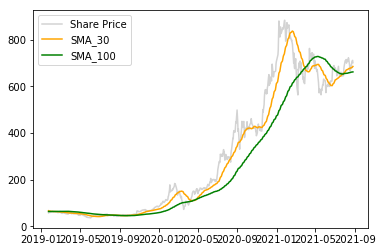

In [5]:
#plots

plt.plot(data['Adj Close'], label="Share Price", color="lightgray")
plt.plot(data[f'SMA_{ma_1}'], label= f"SMA_{ma_1}", color="orange")
plt.plot(data[f'SMA_{ma_2}'], label= f"SMA_{ma_2}", color= "green")
plt.legend(loc="upper left")
plt.show()

In [8]:
# trading signals
buy_signals = []
sell_signals = []
trigger = 0

for x in range(len(data)):
    if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
                                          buy_signals.append(data['Adj Close'].iloc[x])
                                          sell_signals.append(float('nan'))
                                          trigger = 1
    elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
                                          buy_signals.append(float('nan'))
                                          sell_signals.append(data['Adj Close'].iloc[x])
                                          trigger = -1
                                          
    else:
                                          buy_signals.append(float('nan'))
                                          sell_signals.append(float('nan'))
                                          
data['Buy Signals']= buy_signals
data['Sell Signals']= sell_signals
                                          
print(data)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2019-01-23   58.900002   56.338001   58.500000   57.518002   62650000.0   
2019-01-24   58.736000   55.855999   56.605999   58.301998   40061000.0   
2019-01-25   59.703999   57.910000   58.877998   59.408001   36248000.0   
2019-01-28   59.492001   57.549999   58.582001   59.276001   32116500.0   
2019-01-29   59.712002   58.360001   59.054001   59.492001   23108500.0   
2019-01-30   61.799999   59.698002   60.090000   61.754002   56251500.0   
2019-01-31   62.312000   58.799999   60.200001   61.403999   62846000.0   
2019-02-01   63.220001   60.700001   61.084000   62.442001   36417000.0   
2019-02-04   63.060001   60.375999   62.596001   62.577999   36760500.0   
2019-02-05   64.487999   62.450001   62.498001   64.269997   33714000.0   
2019-02-06   64.848000   63.124001   63.917999   63.444000   25192500.0   
2019-02-07   62.939999   

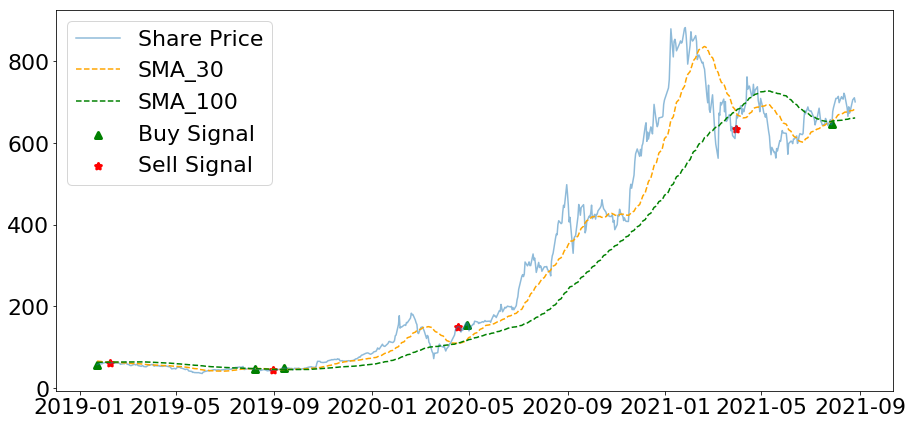

In [11]:
# plot trading signals

plt.plot(data['Adj Close'], label="Share Price", alpha=0.5)
plt.plot(data[f'SMA_{ma_1}'], label=f"SMA_{ma_1}", color="orange", linestyle="--")
plt.plot(data[f'SMA_{ma_2}'], label=f"SMA_{ma_2}", color="green", linestyle="--")
plt.scatter(data.index, data["Buy Signals"], label="Buy Signal", marker="^", color="green", lw=3)
plt.scatter(data.index, data["Sell Signals"], label="Sell Signal", marker="*", color="red", lw=3)
plt.legend(loc="upp left")
plt.rcParams['figure.figsize']= [20,10]
plt.rcParams.update({'font.size':22,})
plt.show()